In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("../source/")
from fuzzy.clustering import *
from sklearn.datasets import load_iris, load_breast_cancer, load_digits, load_wine
from matplotlib.colors import LinearSegmentedColormap, to_rgba
from matplotlib.cm import ScalarMappable
import matplotlib as mpl
from matplotlib.colors import Normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
import numpy as np
from sklearn.utils import resample

palette = mpl.colormaps["Blues"]
errors = mpl.colormaps["Reds"]

# Partitive Clustering

$\min_c \min_u \sum_{i=1}^k \sum_{j=1}^m u_{i,j}^{\frac{2}{1-w}} d_{i,j}$

subject to

$u_{i,j} \in [0,1]$

$\forall j, \sum_{i=1}^k u_{i,j} = 1$




when $d_{i,j} = \sum_{l=1}^d (x_{j,d} - c_{i,d})^2$ then we obtain k-means

Select clusters at random

Compute $d_{i,j}^{\frac{2}{1-w}}$, normalize $d_{i,j}^{\frac{2}{1-w}}/\sum_{l=1}^k d_{l,j}^{\frac{2}{1-w}}$

Update centroids $c_i = \frac{\sum_{j=1}^n u_{i,j}^{\frac{2}{1-w}} x_j}{\sum_{j=1}^n u_{i,j}^{\frac{2}{1-w}}}$

In [10]:
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import pairwise_distances

def remap_labels(X, labels1, labels2):
    costs = np.zeros((len(np.unique(labels1)), len(np.unique(labels2))))
    for i in np.unique(labels1):
        X1 = X[labels1 == i,:]
        
        for j in np.unique(labels2):
            X2 = X[labels2 == j,:]
            dists = pairwise_distances(X1, X2)
            row_ind, col_ind = linear_sum_assignment(dists)
            costs[i,j]  = dists[row_ind, col_ind].sum()
            
    return linear_sum_assignment(costs)

(150, 150)

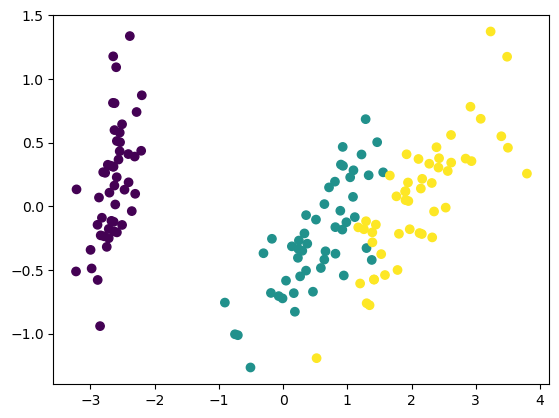

In [13]:
X, y = load_iris(return_X_y=True)

pca = PCA(n_components=2)
X_red = pca.fit_transform(X)

classes = len(np.unique(y))

plt.scatter(X_red[:,0], X_red[:, 1], c=y)

pairwise_distances(X,X).shape

# Fuzzy C-Means

In [4]:
fcm = FuzzyCMeans(n_clusters=classes, fuzzifier=2)
fcm.fit(X)
y_pred = fcm.predict(X)
y_proba = fcm.predict_proba(X)

Text(0.5, 1.0, 'Membership')

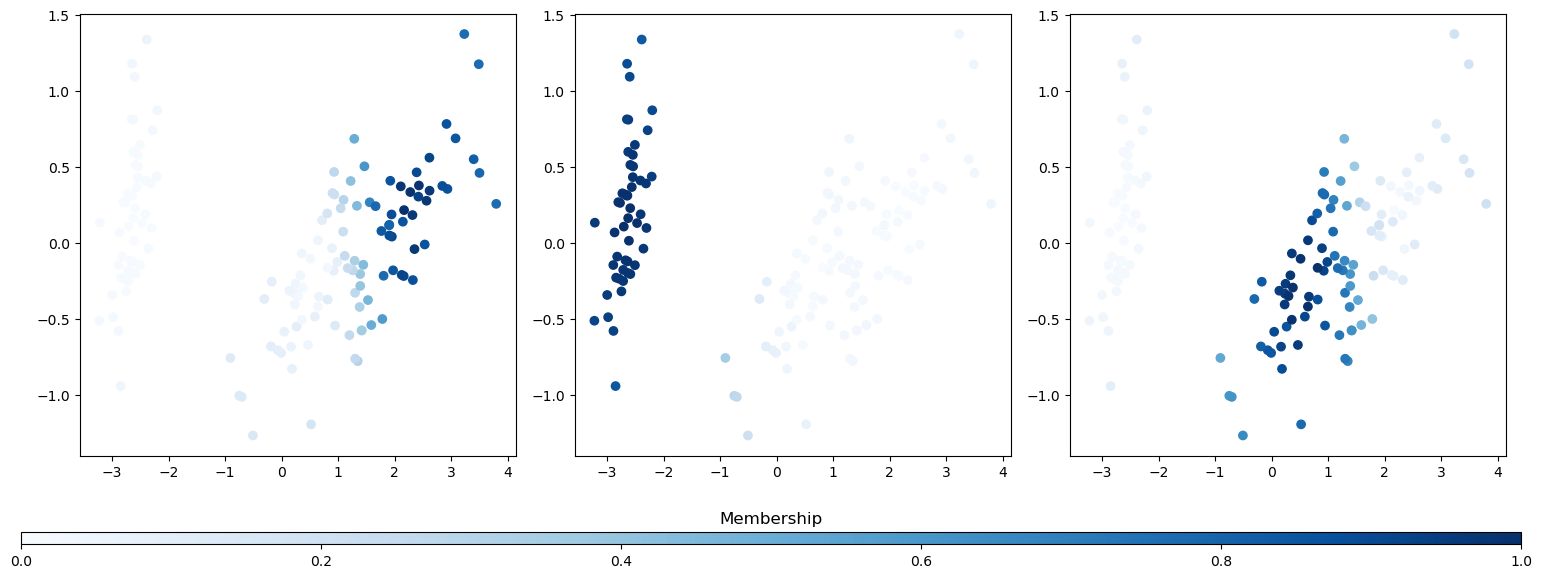

In [5]:
fig, axs = plt.subplots(1,classes, figsize=(5*classes,5))

for i in range(classes):
    axs[i].scatter(X_red[:,0], X_red[:, 1], c=y_proba[i].memberships, cmap=palette)

fig.tight_layout()

im=ScalarMappable(cmap=palette, norm=Normalize(0,1))
cbar_ax = fig.add_axes([0, -0.1, 1, 0.025])
fig.colorbar(im, ax=axs.ravel().tolist(), orientation='horizontal', cax=cbar_ax)
cbar_ax.set_title("Membership")


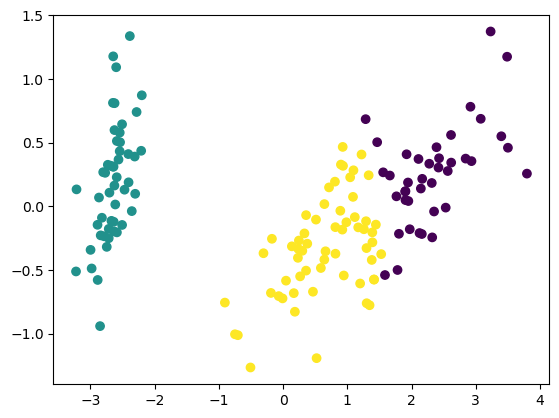

In [6]:
plt.scatter(X_red[:,0], X_red[:, 1], c=y_pred)

Accuracy 0.89


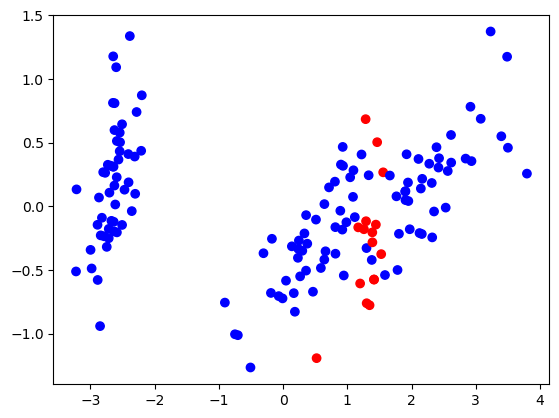

In [7]:
row_ind, col_ind = remap_labels(X, y_pred, y)
row_ind, col_ind

y_remap = [col_ind[i] for i in y_pred]
plt.scatter(X_red[:,0], X_red[:, 1], c=["b" if v else "r" for v in (y_remap==y)])
print("Accuracy %.2f" % (len(y[y==y_remap])/len(y)))

Weighted Accuracy 0.82


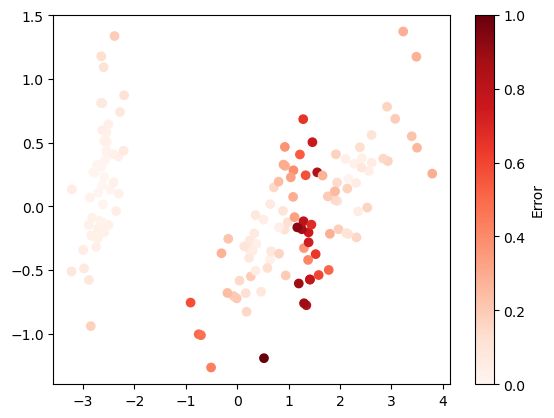

In [8]:
plt.figure()
proba_remap = y_proba[np.argsort(col_ind)]
errs = [1-proba_remap[y[i]].memberships[i] for i in range(len(y))]
plt.scatter(X_red[:,0], X_red[:, 1], c = errs, cmap=errors)

im=ScalarMappable(cmap=errors, norm=Normalize(0,1))
plt.colorbar(im, ax=plt.gca(), label="Error")
print("Weighted Accuracy %.2f" % (1 - np.sum(errs)/X.shape[0]))

In [14]:
centroids = resample(X, replace=False, n_samples=3)
ìcluster_assignments = np.zeros((X.shape[0], 3))
dists = pairwise_distances(X, centroids, metric="euclidean")
cluster_assignments = (dists+0.002)**(2/(1-2))/(np.sum((dists+0.001)**(2/(1-2)), axis=1)[:,np.newaxis])
      

In [16]:
np.sum(cluster_assignments, axis=1)

array([0.99945555, 0.99945127, 0.99947893, 0.99945404, 0.99946328,
       0.99940696, 0.99946997, 0.99944012, 0.99947906, 0.99944379,
       0.99944073, 0.99943431, 0.99946263, 0.99952662, 0.99949522,
       0.99947244, 0.99947037, 0.99944951, 0.99940244, 0.99944854,
       0.99939029, 0.99943716, 0.9995299 , 0.99937316, 0.99938236,
       0.99941258, 0.99940946, 0.99943636, 0.99944861, 0.99943417,
       0.99942559, 0.99941302, 0.99947524, 0.99948286, 0.99943664,
       0.99948007, 0.99946117, 0.99947336, 0.99949278, 0.99943595,
       0.99946841, 0.99948707, 0.99949537, 0.99940223, 0.99937292,
       0.99945016, 0.99943955, 0.9994704 , 0.99944304, 0.99945272,
       0.99845819, 0.99819395, 0.99818232, 0.996614  , 0.99824436,
       0.99534035, 0.99830914, 0.99860087, 0.99834376, 0.99665522,
       0.99863242, 0.99477966, 0.99761056, 0.99773218, 0.9963917 ,
       0.99843522, 0.99637145, 0.99422194, 0.99815346, 0.99552185,
       0.99824531, 0.9954574 , 0.99834792, 0.9976939 , 0.99770